<a href="https://colab.research.google.com/github/CC0R0NAD0/Segmentation-using-multiple-vision-machine-paradigms/blob/main/T2_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [999]:
from google.colab import drive  #Librería para accesar a archivos drive
import os  #Librería manejo del sistema

# Montar el archivo del drive (con previa autorización del usuario)
drive.mount('/content/drive', force_remount=True)

# Abrir el documento con la ruta de acceso personal predeterminada.
os.chdir("/content/drive/MyDrive/Sistemas_V/T2_Segmentacion")  #Cuenta carlos

#os.chdir("/content/drive/MyDrive/TEC/XIII Semestre/Sistemas_V/Mini_Proyecto") #Cuenta Adrián

Mounted at /content/drive


(287, 780, 3)


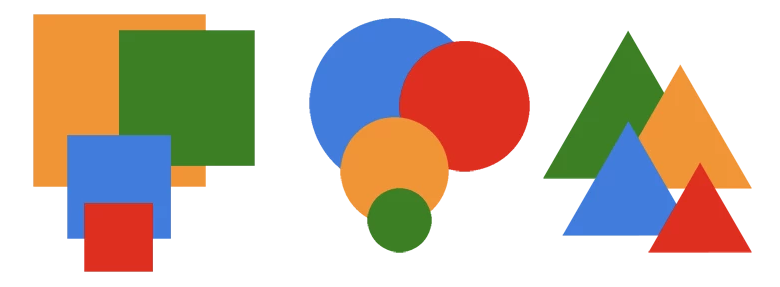

In [1000]:
import cv2  # libreria trabajo con imagenes

from google.colab.patches import cv2_imshow # Se utiliza este parche para 
                                            # poder mostrar las imágenes en
                                            # pantalla


image = cv2.imread('imagenes/figurasColores.png')
image = cv2.imread('imagenes/img_tarea_descargada.png')


print(image.shape)

cv2_imshow(image)

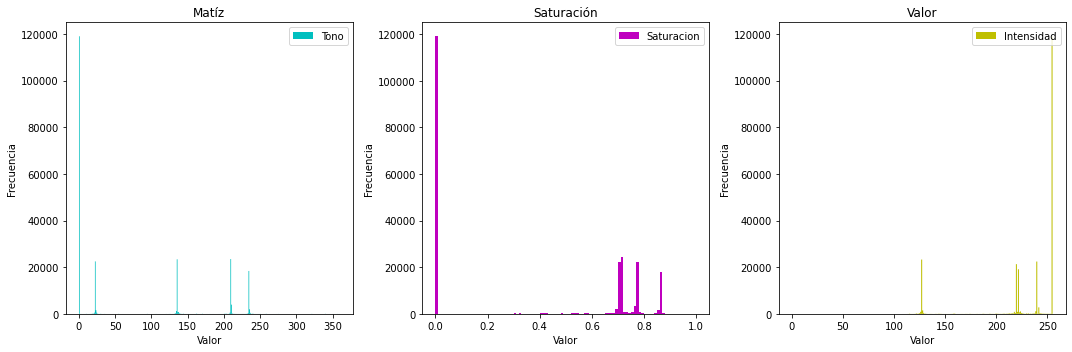

(287, 780, 3)


In [1001]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

array=np.asarray(image)
arr=(array.astype(float))/255.0
img_hsv = colors.rgb_to_hsv(arr[...,:3])
plt.subplots(figsize=(15, 5))

lu1=img_hsv[...,0].flatten()
plt.subplot(1,3,1)
plt.hist(lu1*360,bins=360,range=(0.0,360.0),histtype='stepfilled', color='c', label='Tono')
plt.title("Matíz")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

lu2=img_hsv[...,1].flatten()
plt.subplot(1,3,2)                  
plt.hist(lu2,bins=100,range=(0.0,1.0),histtype='stepfilled', color='m', label='Saturacion')
plt.title("Saturación")   
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

lu3=img_hsv[...,2].flatten()
plt.subplot(1,3,3)                  
plt.hist(lu3*255,bins=256,range=(0.0,255.0),histtype='stepfilled', color='y', label='Intensidad')
plt.title("Valor")   
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()

print(img_hsv.shape)

65.25490196078431
124.48627450980392
220.86274509803923


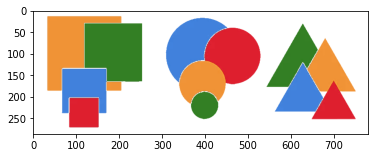

(148401,)


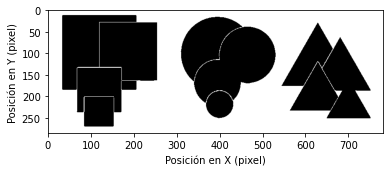

In [1002]:
from types import new_class
h = img_hsv[...,0]
s = img_hsv[...,1]
v = img_hsv[...,2]

img_rgb = arr[...,:3]
R = img_rgb[...,2]
G = img_rgb[...,1]
B = img_rgb[...,0]

h_new = h
s_new = s
v_new = v

#print(256*R.max())
#print(360 * h.mean())
print(256*R[50][400])
print(256*G[50][400])
print(256*B[50][400])


h_img = image.shape[0]
w_img = image.shape[1]


bin_image = np.ones((h_img,w_img))
posic_object = []

val_color1 =  130
val_sat1 = 0.4
por_desvi1 = 0.05


val_color2 =  25
val_sat2 = 0.4
por_desvi2 = 0.05

val_color3 =  210
val_sat3 = 0.4
por_desvi3 = 0.05


val_color4 =  245
val_sat4 = 0.4
por_desvi4 = 0.05

for i in range(h_img):
    for j in range(w_img):
      if ( ( ( val_color1 - (360*por_desvi1) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi1) ) )   and  (s[i,j] > val_sat1 )  ):
        #if (   ( (256 * R[i,j]) > 115 ) and ( (256 * G[i,j]) > 128) and ( (256 * B[i,j]) < 128)):
        bin_image[i,j] = 0
        h_new[i,j] = val_color1/360.0
        posic_object.append(image[i,j,0])

      elif ( ( ( val_color2 - (360*por_desvi2) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi2) ) )   and  (s[i,j] > val_sat2 )  ):
          bin_image[i,j] = 0
          h_new[i,j] = val_color2/360.0

      elif ( ( ( val_color3 - (360*por_desvi3) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi3) ) )   and  (s[i,j] > val_sat2 )  ):
          bin_image[i,j] = 0
          h_new[i,j] = val_color3/360.0

      elif ( ( ( val_color4 - (360*por_desvi4) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi4) ) )   and  (s[i,j] > val_sat2 )  ):
          bin_image[i,j] = 0
          h_new[i,j] = val_color4/360.0

      else:
            bin_image[i,j] = 1
            h_new[i,j] = 160/256
            v_new[i,j] = 1
            s_new[i,j] = 0
            posic_object.append(image[i,j,0])


recolor = img_hsv
recolor[...,0] = h_new
recolor[...,1] = s_new
recolor[...,2] = v_new



new_color = cv2.merge([h_new, s_new, v_new])
new_color = colors.hsv_to_rgb(recolor[...,:3])
#recolor = colors.hsv_to_rgb(recolor[...,:3])

#new_color = recolor

#recolor.astype(np.uint8)
#from PIL import Image

#new_color = Image.fromarray(recolor.astype(np.uint32))

# new_color2 = new_color
# new_color2[...,0] = new_color[...,2]
# new_color2[...,2] = new_color[...,0]

#new_color = new_color.astype(np.uint32)

new_color = cv2.cvtColor(np.float32(new_color), cv2.COLOR_BGR2RGB)
#cv2.imwrite('color_img.jpg', recolor)
plt.imshow(new_color)
#cv2_imshow(new_color)
#cv2_imshow(new_color)

#plt.show()
#plt.savefig('foo.png')
#plt.close()



#imgplot_BN=plt.imshow(new_color)
plt.show()


#****************************************************
posic_object = np.array(posic_object)
print(posic_object.shape)


imgplot_BN=plt.imshow(bin_image, cmap=plt.cm.gray)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")


plt.show()

Text(0, 0.5, 'Posición en Y (pixel)')

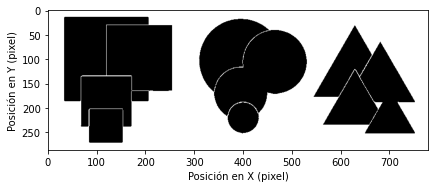

In [1003]:
# Se aplica un filtro Gauss a la imagen, para que las transiciones sean más suaves
gauss = cv2.GaussianBlur(bin_image, (5,5)  , 2) # el último parámetro de esta función
                                         # determina que tanto se difunina la imagen                                  
plt.subplots(figsize=(15, 4)) # tamaño de imagen
plt.subplot(1,2,1) # tamaño 1 fila,2 columnas, columna 1
plt.imshow(bin_image, cmap=plt.cm.gray)     # Muestra la imagen
#plt.title("Imagen filtrada")
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")

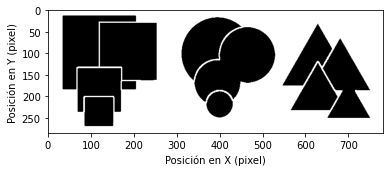

In [1004]:
filtrada = np.ones((h_img,w_img))
pas_bin = bin_image
for i in range(h_img):
    for j in range(w_img):
        if (    pas_bin[i,j] == 0 ):
          if( (  1 < i < (h_img-1)  )  and  ( 1 < j < (w_img-1)) ):
            filtrada[i,j] = max(  pas_bin[i-1,j] ,
                                  pas_bin[i+1,j] ,
                                  pas_bin[i,j-1] ,
                                  pas_bin[i,j+1] ,
                                  
                                  pas_bin[i-1,j-1] ,
                                  pas_bin[i-1,j+1] ,
                                  pas_bin[i+1,j-1] ,
                                  pas_bin[i+1,j+1] )


        else:
            filtrada[i,j] = 1

imgplot_BN=plt.imshow(filtrada, cmap=plt.cm.gray)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")


plt.show()


In [1005]:
h = img_hsv[...,0]
s = img_hsv[...,1]
v = img_hsv[...,2]

print(h.shape)
h_acomodo =  np.sort(h.flatten())

print(h.shape)
print(h_acomodo.shape)

print(360*h.min())
print(360*h_acomodo[-70])





# bin_image = np.ones((h_img,w_img))


# val_color =  235
# val_sat = 0.4
# por_desvi = 0.05

# for i in range(h_img):
#     for j in range(w_img):
#         if ( ( ( val_color - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color + (360*por_desvi) ) )   and  (s[i,j] > val_sat )  ):
#         #if (   ( (256 * R[i,j]) > 115 ) and ( (256 * G[i,j]) > 128) and ( (256 * B[i,j]) < 128)):
#           bin_image[i,j] = 0
#           posic_object.append(image[i,j,0])


#         else:
#             bin_image[i,j] = 1
#             posic_object.append(image[i,j,0])


# posic_object = np.array(posic_object)
# print(posic_object.shape)


# imgplot_BN=plt.imshow(bin_image, cmap=plt.cm.gray)
# plt.xlabel("Posición en X (pixel)")
# plt.ylabel("Posición en Y (pixel)")


# plt.show()

(287, 780)
(287, 780)
(223860,)
25.0
245.0


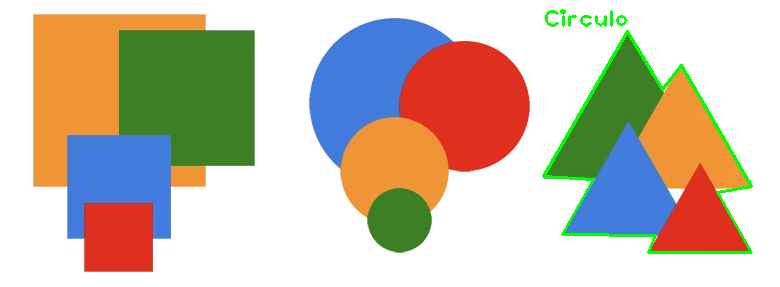

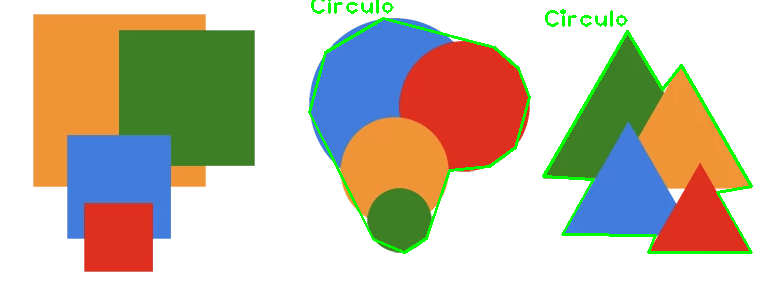

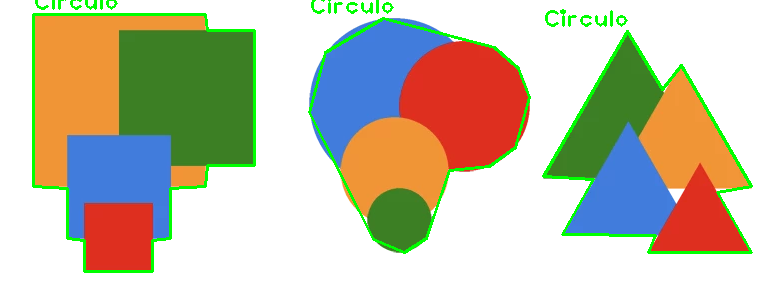

(287, 780, 3)


In [1006]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#slice1Copy = np.uint8(bin_image)
#gray = (bin_image*255).astype(np.uint8)

canny = cv2.Canny(gray , 10, 150)
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)
#_, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
#_,cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 3
cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 4
#cv2.drawContours(image, cnts, -1, (0,255,0), 2)
for c in cnts:
  epsilon = 0.01*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  #print(len(approx))
  x,y,w,h = cv2.boundingRect(approx)
  if len(approx)==3:
    cv2.putText(image,'Triangulo', (x,y-5),1,1.5,(0,255,0),2)
  if len(approx)==4:
    aspect_ratio = float(w)/h
    print('aspect_ratio= ', aspect_ratio)
    if aspect_ratio == 1:
      cv2.putText(image,'Cuadrado', (x,y-5),1,1.5,(0,255,0),2)
    else:
      cv2.putText(image,'Rectangulo', (x,y-5),1,1.5,(0,255,0),2)
  if len(approx)==5:
    cv2.putText(image,'Pentagono', (x,y-5),1,1.5,(0,255,0),2)
  if len(approx)==6:
    cv2.putText(image,'Hexagono', (x,y-5),1,1.5,(0,255,0),2)
  if len(approx)>10:
    cv2.putText(image,'Circulo', (x,y-5),1,1.5,(0,255,0),2)
  cv2.drawContours(image, [approx], 0, (0,255,0),2)
  cv2_imshow(image)
  cv2.waitKey(0)

print(image.shape)